# Airlines Delay

## Table of Contents
* [Introduction](#Intro)
    * [Variables](#Q01)
    * [Questions](#Q02)
* [Importing and cleaning data](#Ex1)
* [Question 1:](#Q1)
    * [Temporal evolution of the arrival delay](#Q11)
    * [Days with more delay](#Q12)
    * [Months with more delay](#Q13)
* [Question 2:](#Q2)
    * [Delayed flights](#Q21)
    * [Cancelled flights](#Q22)
* [Question 3](#Q3)
    * [Airlines with more delay](#Q31)
    * [Airports with more delay](#Q32)
* [Question 4](#Q4)
* [Question 5](#Q5)
* [Exporting the data to excel](#Exc)
* [Conclusions](#Concl)

# Introduction <a class="anchor" id="Intro"></a>

In 2010 the US Federal Aviation Administration, reported that the economic price of domestic flight delays imply a yearly cost of 32.9 billion dollars to passengers, airlines and other parts of the economy. About half of such amount comes from the passengers, who due to the lose time waiting, they also miss connecting flights, had to spend money on food and hotels. 

But, what are the causes for these delays?
In order to answer this question, we are going to analyze the provided dataset, containing up to 1.936.758, which we will reduce up to 200000 due to memory reasons,  different internal flights in the US for 2008 and their causes for delay, diversion and cancellation; if any. 
The data comes from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS).

## Variables
1.  **Unnamed 0**: Typo. 
2.	**Year**:	2008
3.	**Month**:	1-12, 1 (Jan)- 12 (Dec)
4.	**DayofMonth**:	1-31
5.	**DayOfWeek**:	1 (Monday) - 7 (Sunday)
6.	**DepTime**:	Actual departure time (local, hhmm)
7.	**CRSDepTime**:	Scheduled departure time (local, hhmm)
8.	**ArrTime**:	Actual arrival time (local, hhmm)
9.	**CRSArrTime**: Scheduled arrival time (local, hhmm)
10.	**UniqueCarrier**: Unique carrier code
11.	**FlightNum**: Flight number
12.	**TailNum**: Plane tail number: aircraft registration, unique aircraft identifier
13.	**ActualElapsedTime**: Elapsed time	in minutes
14.	**CRSElapsedTime**: In minutes
15.	**AirTime**: Time that the plane is in air,	in minutes
16.	**ArrDelay**: Arrival delay, in minutes.
17.	**DepDelay**: Departure delay, in minutes
18.	**Origin**: Origin IATA airport code
19.	**Dest**: Destination IATA airport code
20.	**Distance**: Plane distance, in miles
21.	**TaxiIn**: Taxi in time, in minutes
22.	**TaxiOut**: Taxi out time, in minutes
23.	**Cancelled**: If the flight was cancelled or not. 0: Not cancelled - 1: Cancelled
24.	**CancellationCode**: Reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
25.	**Diverted**: 1 = yes, 0 = no
26.	**CarrierDelay**: In minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew. 
27.	**WeatherDelay**: In minutes: Weather delay is caused by extreme or hazardous weather conditions before, after or during the  flight. 
28.	**NASDelay**: In minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. 
29.	**SecurityDelay**. In minutes: Security delay is caused by evacuation of a terminal for example. 
30.	**LateAircraftDelay**. In minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

## Questions 

1. **Which was the day of the week that arrived later the flight? And the day of the month? And the month?**
2. **Which was the main cause of cancellation?**
3. **Which airline has more delays? And which airport?**
4. **What is the percentage of cancelled flights?**
5. **What are the largest routes?**

# Importing and cleaning data <a class="anchor" id="Ex1"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import datetime as dt

In [45]:
data=pd.read_csv('DelayedFlights.csv', sep=',')

In [46]:
df=data.copy()
df=df.sample(200000)

In [47]:
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1572542,5637864,2008,10,17,5,1759.0,1720,1943.0,1911,US,...,5.0,20.0,0,N,0,32.0,0.0,0.0,0.0,0.0
1351009,4557472,2008,8,11,1,1434.0,1257,1444.0,1310,EV,...,3.0,16.0,0,N,0,94.0,0.0,0.0,0.0,0.0
1742158,6501249,2008,12,14,7,1354.0,1255,1611.0,1455,WN,...,5.0,6.0,0,N,0,1.0,0.0,17.0,0.0,58.0
1028235,3440058,2008,6,23,1,1830.0,1705,1933.0,1815,NW,...,10.0,15.0,0,N,0,0.0,9.0,0.0,0.0,69.0
776767,2557741,2008,5,1,4,1855.0,1813,2041.0,2005,OO,...,5.0,13.0,0,N,0,36.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479913,1506126,2008,3,7,5,1951.0,1835,2128.0,2017,EV,...,21.0,11.0,0,N,0,71.0,0.0,0.0,0.0,0.0
1214812,4061137,2008,7,9,3,653.0,634,809.0,752,NW,...,5.0,20.0,0,N,0,17.0,0.0,0.0,0.0,0.0
724685,2373541,2008,4,4,5,1500.0,1429,1647.0,1600,DL,...,7.0,9.0,0,N,0,0.0,0.0,16.0,0.0,31.0
1052055,3513188,2008,6,23,1,1922.0,1840,2141.0,2105,AA,...,3.0,22.0,0,N,0,0.0,0.0,36.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 1237034 to 1296121
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   Year               200000 non-null  int64  
 2   Month              200000 non-null  int64  
 3   DayofMonth         200000 non-null  int64  
 4   DayOfWeek          200000 non-null  int64  
 5   DepTime            200000 non-null  float64
 6   CRSDepTime         200000 non-null  int64  
 7   ArrTime            199273 non-null  float64
 8   CRSArrTime         200000 non-null  int64  
 9   UniqueCarrier      200000 non-null  object 
 10  FlightNum          200000 non-null  int64  
 11  TailNum            200000 non-null  object 
 12  ActualElapsedTime  199124 non-null  float64
 13  CRSElapsedTime     199972 non-null  float64
 14  AirTime            199124 non-null  float64
 15  ArrDelay           199124 non-null  float64


Remove *Unname0* column and create *Date* column, and *Flight_speed*

In [6]:
df=df.drop(columns=['Unnamed: 0'])
df['Date'] = pd.to_datetime(data.Year*10000+data.Month*100+data.DayofMonth,format='%Y%m%d')
df['Time_flight']=np.abs(df['ArrTime']-df['DepTime']) # In min
df['Flight_speed']=1.609*60*df['Distance']/df['Time_flight'] # In Km/h

Related with the delay, we have different columns: *DepTime*, *CRSDepTime*, *ArrTime*,*CRSArrTime*,*ActualElapsedTime*, *CRSElapsedTime*, *AirTime*, *ArrDelay* and *DepDelay*. From all these columns, we will keep only *ArrDelay* and *DepDelay*, as what we are interested to is in the total amount of time that the flight was delayed.

In [7]:
df=df.drop(columns=['CRSDepTime'])
df=df.drop(columns=['CRSArrTime'])
df=df.drop(columns=['ActualElapsedTime'])
df=df.drop(columns=['CRSElapsedTime'])
df=df.drop(columns=['AirTime'])

Also, we can remove the *FlightNum* and *TailNum* columns as it is just an identifier as well as the *TaxiIn* and *TaxiOut*. Finally, we can remove the *Year* column as the data is only from 2008 and we have already created our *Date* column.  

In [8]:
df=df.drop(columns=['TailNum'])
df=df.drop(columns=['FlightNum'])
df=df.drop(columns=['TaxiIn'])
df=df.drop(columns=['TaxiOut'])
df=df.drop(columns=['Year'])

Now, we are going to create a new column called *Level*, with the following code: 
- 0: In time
- 1: Slightly delayed
- 2: Highly delayed
- 3: Diverted 
- 4: Cancelled 

In [9]:
for dataset in df:
    df.loc[df['ArrDelay'] <= 15, 'Level'] = 0
    df.loc[df['ArrDelay'] >= 15, 'Level'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Level'] = 2
    df.loc[df['Diverted'] == 1, 'Level'] = 3
    df.loc[df['Cancelled'] == 1, 'Level'] = 4

In [10]:
is_cancelled=(df.Level==4)
Cancelledflights=df[is_cancelled] # Flights cancelled

In [11]:
Cancelledflights

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,Time_flight,Flight_speed,Level
1873325,12,23,2,1058.0,NaN,MQ,NaN,178.0,MKE,ORD,...,0,NaN,NaN,NaN,NaN,NaN,2008-12-23,NaN,NaN,4.0
1782841,12,9,2,823.0,NaN,YV,NaN,16.0,ORD,MKE,...,0,NaN,NaN,NaN,NaN,NaN,2008-12-09,NaN,NaN,4.0
1796005,12,23,2,1730.0,NaN,OO,NaN,130.0,CVG,ORD,...,0,NaN,NaN,NaN,NaN,NaN,2008-12-23,NaN,NaN,4.0
1889295,12,22,1,2020.0,NaN,9E,NaN,189.0,SHV,DTW,...,0,NaN,NaN,NaN,NaN,NaN,2008-12-22,NaN,NaN,4.0
1556173,10,25,6,1445.0,NaN,OH,NaN,50.0,RDU,JFK,...,0,NaN,NaN,NaN,NaN,NaN,2008-10-25,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849787,12,18,4,2043.0,NaN,EV,NaN,7.0,ATL,PFN,...,0,NaN,NaN,NaN,NaN,NaN,2008-12-18,NaN,NaN,4.0
1724826,11,30,7,2142.0,NaN,CO,NaN,22.0,SNA,EWR,...,0,NaN,NaN,NaN,NaN,NaN,2008-11-30,NaN,NaN,4.0
1826843,12,19,5,1015.0,NaN,US,NaN,35.0,LAS,CLT,...,0,NaN,NaN,NaN,NaN,NaN,2008-12-19,NaN,NaN,4.0
1885290,12,26,5,1855.0,NaN,NW,NaN,10.0,MEM,ORD,...,0,NaN,NaN,NaN,NaN,NaN,2008-12-26,NaN,NaN,4.0


We observe that the flights cancelled have Nan values in the *CarrierDelay*, *WeatherDelay*, *NASDelay*, *SecurityDelay* and *LateAircraftDelay*. We will have to take into account this when dealing with the Nan values.

In [12]:
df.isna().sum()

Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
ArrTime                727
UniqueCarrier            0
ArrDelay               876
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         71262
WeatherDelay         71262
NASDelay             71262
SecurityDelay        71262
LateAircraftDelay    71262
Date                     0
Time_flight            727
Flight_speed           727
Level                    0
dtype: int64

In [13]:
df[df['WeatherDelay']==0.0].count()

Month                118656
DayofMonth           118656
DayOfWeek            118656
DepTime              118656
ArrTime              118656
UniqueCarrier        118656
ArrDelay             118656
DepDelay             118656
Origin               118656
Dest                 118656
Distance             118656
Cancelled            118656
CancellationCode     118656
Diverted             118656
CarrierDelay         118656
WeatherDelay         118656
NASDelay             118656
SecurityDelay        118656
LateAircraftDelay    118656
Date                 118656
Time_flight          118656
Flight_speed         118656
Level                118656
dtype: int64

We can observe that, 118927 of 200000, are 0 (about 60%), 71000 are NaN (the 36%), and about 4% have a non-zero value. Hence, it seems reasanoble to replace the NaN values by 0, as if we decided to remove the rows with NaN, we would be removing almost half of our dataset.

In [14]:
df[['ArrDelay','ArrTime','CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay','LateAircraftDelay', 'Time_flight','Flight_speed']]=df[['ArrDelay','ArrTime','CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay','LateAircraftDelay', 'Time_flight','Flight_speed']].replace(np.nan, 0)

Let's verify it:

In [15]:
Cancelledflights=df[is_cancelled] 
Cancelledflights.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
ArrTime              0
UniqueCarrier        0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
Date                 0
Time_flight          0
Flight_speed         0
Level                0
dtype: int64

In [16]:
data_to_describe=df[['ArrDelay','Distance','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','Flight_speed']]

In [17]:
data_to_describe.describe()

,ArrDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Flight_speed
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05
mean,41.869925,768.735420,12.368895,2.335215,9.539980,0.062420,16.315865,inf
std,56.642996,576.922937,35.976922,16.866243,28.063476,1.824404,35.942526,NaN
min,-61.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,9.000000,340.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.121796e+02
50%,24.000000,610.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.831840e+02
75%,55.000000,1005.000000,10.000000,0.000000,6.000000,0.000000,18.000000,3.861600e+02
max,2461.000000,4962.000000,1455.000000,872.000000,1289.000000,392.000000,1254.000000,inf


We observe that the Fligh_speed mean is infinite, which of course do not make sense. Let's fix this:

In [18]:
df[df.Flight_speed==np.inf]

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,Time_flight,Flight_speed,Level
1362966,8,11,1,2005.0,2005.0,FL,30.0,48.0,ATL,MEM,...,0,30.0,0.0,0.0,0.0,0.0,2008-08-11,0.0,inf,1.0
567569,3,1,6,2031.0,2031.0,DL,7.0,26.0,ATL,PNS,...,0,0.0,0.0,0.0,0.0,0.0,2008-03-01,0.0,inf,0.0
1375786,8,5,2,1043.0,1043.0,MQ,13.0,8.0,FWA,ORD,...,0,0.0,0.0,0.0,0.0,0.0,2008-08-05,0.0,inf,0.0
485583,3,24,1,1407.0,1407.0,EV,153.0,160.0,ATL,GTR,...,0,153.0,0.0,0.0,0.0,0.0,2008-03-24,0.0,inf,2.0
947614,6,11,3,820.0,820.0,OO,14.0,20.0,SLC,EKO,...,0,0.0,0.0,0.0,0.0,0.0,2008-06-11,0.0,inf,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890450,6,9,1,2151.0,2151.0,WN,6.0,11.0,CMH,MDW,...,0,0.0,0.0,0.0,0.0,0.0,2008-06-09,0.0,inf,0.0
1483283,9,15,1,1359.0,1359.0,EV,23.0,29.0,ATL,MEI,...,0,0.0,23.0,0.0,0.0,0.0,2008-09-15,0.0,inf,1.0
676359,4,28,1,1126.0,1126.0,MQ,11.0,6.0,GRR,ORD,...,0,0.0,0.0,0.0,0.0,0.0,2008-04-28,0.0,inf,0.0
22394,1,24,4,932.0,932.0,WN,7.0,12.0,PHX,LAS,...,0,0.0,0.0,0.0,0.0,0.0,2008-01-24,0.0,inf,0.0


We note that the reason why the speed is $\infty$, is due to the fact that *Time_flight* is equal to 0. The reason behind this is because the Departure time and the Arrival time are the same, which of course do not make sense, as planes are not electrons, and they cannot be in two places at the same time. Then, we decide to remove these values:

In [19]:
df=df.replace([np.inf, -np.inf], np.nan)
df=df.replace(np.nan,df.Flight_speed.mean())
data_to_describe=df[['ArrDelay','Distance','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','Flight_speed']]

In [20]:
df[df.Flight_speed==np.inf].count()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
ArrTime              0
UniqueCarrier        0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
Date                 0
Time_flight          0
Flight_speed         0
Level                0
dtype: int64

In [21]:
data_to_describe.describe()

,ArrDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Flight_speed
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,41.869925,768.735420,12.368895,2.335215,9.539980,0.062420,16.315865,411.662717
std,56.642996,576.922937,35.976922,16.866243,28.063476,1.824404,35.942526,926.106129
min,-61.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,340.000000,0.000000,0.000000,0.000000,0.000000,0.000000,212.179640
50%,24.000000,610.000000,0.000000,0.000000,0.000000,0.000000,0.000000,283.184000
75%,55.000000,1005.000000,10.000000,0.000000,6.000000,0.000000,18.000000,386.160000
max,2461.000000,4962.000000,1455.000000,872.000000,1289.000000,392.000000,1254.000000,78487.020000


We observe that the mean arrival delay is 42 min and the mean distance flight is of 766 milles (1230 km), and the mean flight speed is 413 km/h. Also remarkabale, the largest distance is 4962 miles (about 8000 km), that is more or less the greatest distance between any two mainland points in the contiguous 48 states (linear distance): 2,892 miles (4,654 km), from Point Arena, California, to West Quoddy Head, Maine. On the other hand, the mean contribution to the delay comes from the CarrierDelay (12,5 min) and LateAircraftDelay (16,24 min).  	

# Question 1  <a class="anchor" id="Q1"></a>

## Temporal evolution of the arrival delay

In [22]:
date_delay = df[['Date','ArrDelay']].sort_values(by='Date')
date_delay

,Date,ArrDelay
159787,2008-01-01,39.0
168408,2008-01-01,177.0
91699,2008-01-01,11.0
91974,2008-01-01,54.0
132941,2008-01-01,37.0
...,...,...
1796266,2008-12-31,0.0
1817963,2008-12-31,1.0
1921614,2008-12-31,15.0
1880503,2008-12-31,57.0


In [23]:
date_delay = date_delay.groupby(by='Date').mean()
date_delay

,ArrDelay
Date,
2008-01-01,46.919633
2008-01-02,41.962202
2008-01-03,36.290988
2008-01-04,43.866582
2008-01-05,47.456873
...,...
2008-12-27,60.738672
2008-12-28,35.186890
2008-12-29,22.544484


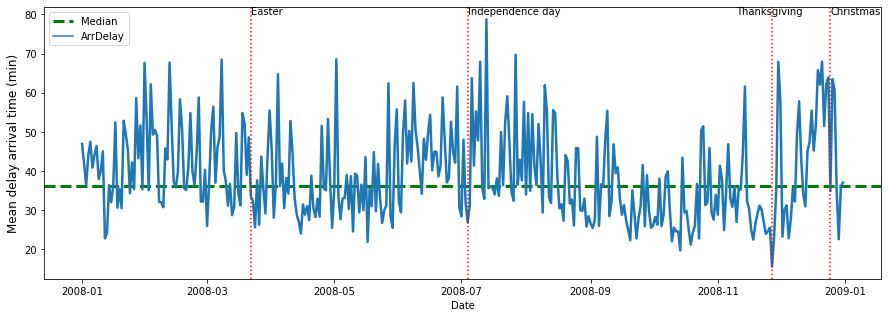

In [24]:
plt.figure(figsize=(15,5))
plt.axhline(y=np.nanmedian(date_delay), color='green', linestyle='--', linewidth=3, label='Median')
ax=sns.lineplot(data=date_delay, linewidth=2.5, legend='auto')
plt.axvline(dt.datetime(2008, 7,4), color='red', linestyle=':')
plt.text(dt.datetime(2008, 7,4), 80, 'Independence day')
plt.axvline(dt.datetime(2008, 12,25), color='red', linestyle=':')
plt.text(dt.datetime(2008, 12,25), 80, 'Christmas')
plt.axvline(dt.datetime(2008, 11,27), color='red', linestyle=':')
plt.text(dt.datetime(2008, 11,10), 80, 'Thanksgiving')
plt.axvline(dt.datetime(2008, 3,22), color='red', linestyle=':')
plt.text(dt.datetime(2008, 3,22), 80, 'Easter')
ax.set_ylabel("Mean delay arrival time (min)", fontsize = 12)

plt.show()

## Days with more delay

The days with more delay are:

In [25]:
#Days with more delay:
date_delay.sort_values(by='ArrDelay', ascending=False).head(10)

,ArrDelay
Date,
2008-07-13,78.736631
2008-07-27,69.693182
2008-05-02,68.549112
2008-03-08,68.452909
2008-12-21,67.904297
2008-07-10,67.895865
2008-11-30,67.870197
2008-02-12,67.696379
2008-01-31,67.626401


It can be observed that the days with more delays are around the holidays more important: Christmas, Thanksgiving and Easter.
The days with less delay are:

In [26]:
#Days with less delay:
date_delay.sort_values(by='ArrDelay',  ascending=False).tail(10)

,ArrDelay
Date,
2008-09-23,22.741935
2008-10-23,22.716146
2008-12-29,22.544484
2008-11-18,22.425439
2008-09-20,22.260204
2008-10-10,21.993392
2008-05-17,21.849530
2008-10-19,21.180879
2008-10-14,19.663121


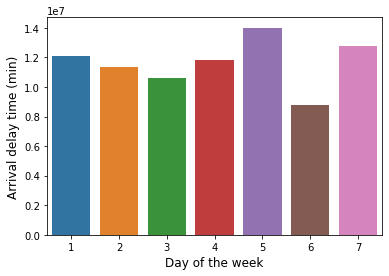

In [27]:
day_delay = data[['DayOfWeek', 'ArrDelay']]
day_delay = day_delay.groupby(by='DayOfWeek').sum()
day_delay=day_delay.reset_index(drop=False)
ax=sns.barplot(x='DayOfWeek', y='ArrDelay', data=day_delay)
ax.set_ylabel("Arrival delay time (min)", fontsize = 12)
ax.set_xlabel("Day of the week", fontsize = 12)

plt.show()

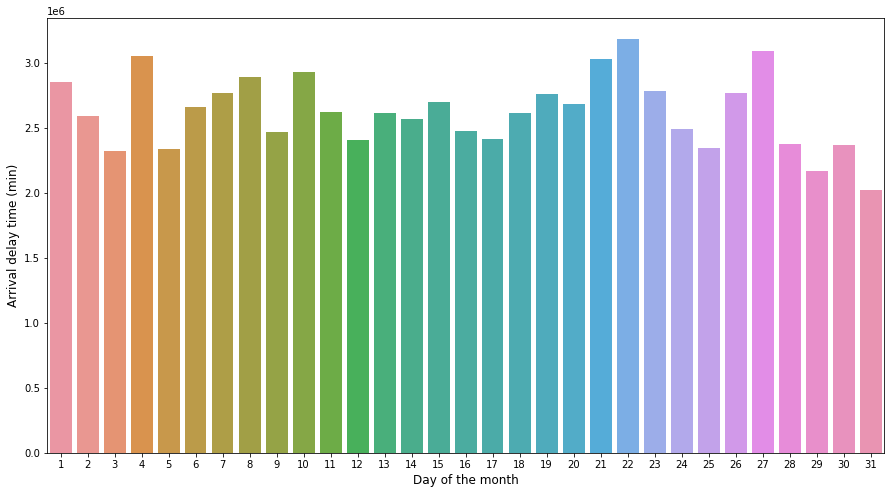

In [28]:
daym_delay = data[['DayofMonth', 'ArrDelay']]
daym_delay = daym_delay.groupby(by='DayofMonth').sum()
daym_delay=daym_delay.reset_index(drop=False)
plt.figure(figsize=(15,8))
ax=sns.barplot(x='DayofMonth', y='ArrDelay', data=daym_delay)
ax.set_ylabel("Arrival delay time (min)", fontsize = 12)
ax.set_xlabel("Day of the month", fontsize = 12)
plt.show()

## Months with more delay

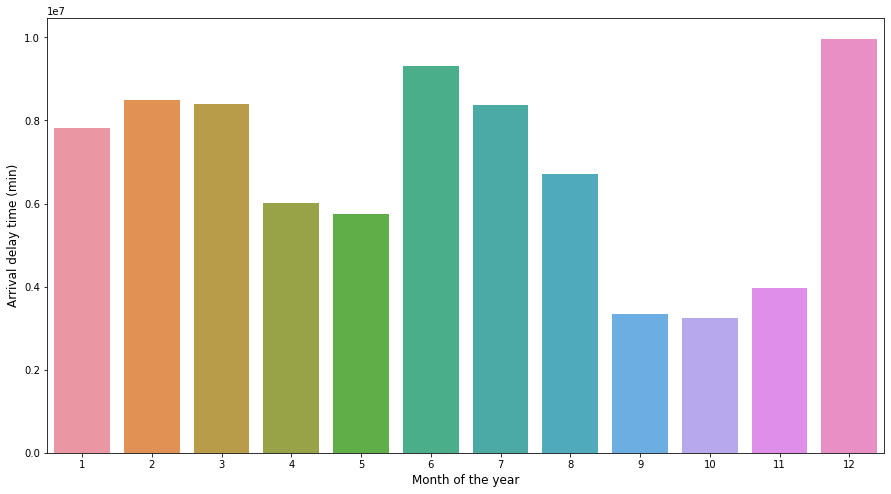

In [29]:
month_delay = data[['Month', 'ArrDelay']]
month_delay = month_delay .groupby(by='Month').sum()
month_delay =month_delay .reset_index(drop=False)
plt.figure(figsize=(15,8))
ax=sns.barplot(x='Month', y='ArrDelay', data=month_delay )
ax.set_ylabel("Arrival delay time (min)", fontsize = 12)
ax.set_xlabel("Month of the year", fontsize = 12)
plt.show()

From the last four graphs, we can conclude that:
- The peaks of delay are just before and after holidays, not during. 
- December, July and Augoust are the months with more delays, coinciding with the winter and summer holidays.
- The second half of the month shows a larger delay time than in the first half. Note that the 31st cannot be taken into account as many months do not have 31 days.
- Friday and Sunday show the greatest delays, coinciding with the beginning and ending of the weekend. 


# Question 2 <a class="anchor" id="Q2"></a>

### Delayed flights

In [30]:

df['Level'].value_counts().sort_values(ascending=False)

1.0    82721
0.0    70386
2.0    46017
3.0      809
4.0       67
Name: Level, dtype: int64

From 200000 flights,  65 flights (0.03%) were cancelled and 789 diverted (0.4%). On the other hand, 82528 (41%) left with a slightly delay (>15 min and <60min),  while 46161 (23%) left with a strong delay (> 60 min). Only, 70146 flights (35%) left in time. This means that 76.4%  of the flights left with delay or were cancelled or diverted.   

Text(0, 0.5, 'Counts')

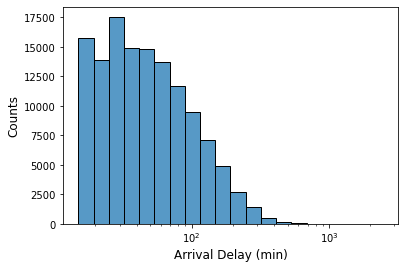

In [31]:
is_delayed=(df.Level >= 1) &(df.Level < 3)
Delayedflights=df[is_delayed] #Flights delayed

ax=sns.histplot(data=Delayedflights, x='ArrDelay', log_scale=True, bins=20)
ax.set_xlabel("Arrival Delay (min)", fontsize = 12)
ax.set_ylabel("Counts", fontsize = 12)

It can be seen in the histogram, that delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, being located between 0 and 100 min,  but the longer delays, even being unusual, are extremely long.

### Cancelled flights

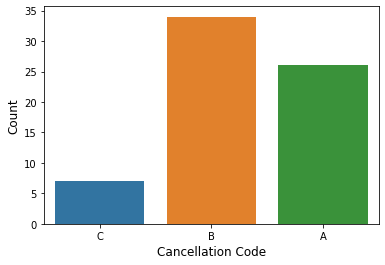

A = carrier, B = weather, C = NAS


In [32]:
ax=sns.countplot(x = Cancelledflights['CancellationCode'])
ax.set_ylabel("Count", fontsize = 12)
ax.set_xlabel("Cancellation Code", fontsize = 12)
plt.show()


print('A = carrier, B = weather, C = NAS')

# Question 3 <a class="anchor" id="Q3"></a>

### Airlines with more delay

In [33]:
Airline_delays = df[['UniqueCarrier', 'DepDelay']]
Airline_delays = Airline_delays.groupby(by='UniqueCarrier').sum()
Airline_delays=Airline_delays.reset_index(drop=False)
Airline_delays=Airline_delays.sort_values(by='DepDelay', ascending=False)
Airline_delays.head(10) #10 airports with more delay

,UniqueCarrier,DepDelay
17,WN,1345587.0
1,AA,923292.0
15,UA,723006.0
11,MQ,634971.0
14,OO,610590.0
18,XE,527677.0
6,DL,464760.0
5,CO,443621.0
7,EV,402143.0
19,YV,394512.0


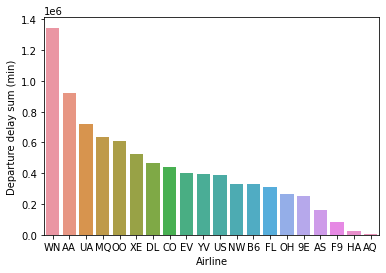

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [34]:
ax=sns.barplot(x='UniqueCarrier', y='DepDelay', data=Airline_delays)
ax.set_ylabel('Departure delay sum (min)')
ax.set_xlabel('Airline')
plt.show()
print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

The airline with more delays is WN (Southwest Airlines), followed by AA (American Airlines)

### Airports with more delay

In [36]:
Aerop = Delayedflights['Origin'].value_counts(dropna=False)
Aerop.head(10)

ORD    9377
ATL    9024
DFW    6330
DEN    4933
EWR    3686
LAX    3498
IAH    3491
DTW    3277
PHX    3188
SFO    3187
Name: Origin, dtype: int64

In [37]:
Top10airports = data[(data.Origin == 'ORD') | 
                     (data.Origin == 'ATL') |
                     (data.Origin == 'DFW') | 
                     (data.Origin == 'DEN') |
                     (data.Origin == 'EWR') |
                     (data.Origin == 'LAX') | 
                     (data.Origin == 'IAH') |
                     (data.Origin == 'PHX') |
                     (data.Origin == 'DTW') |
                     (data.Origin == 'SFO') | 
                     (data.Origin == 'LAS')]

In [38]:
Airport_delays = Top10airports[['Origin', 'DepDelay']]
Airport_delays = Airport_delays.groupby(by='Origin').sum()
Airport_delays=Airport_delays.reset_index(drop=False)
Airport_delays=Airport_delays.sort_values(by='DepDelay', ascending=False)
Airport_delays.head(10)

,Origin,DepDelay
8,ORD,6365866.0
0,ATL,5382082.0
2,DFW,3658231.0
1,DEN,2801893.0
4,EWR,2669013.0
7,LAX,2243621.0
10,SFO,2150988.0
5,IAH,2145134.0
6,LAS,2085003.0
9,PHX,1963688.0


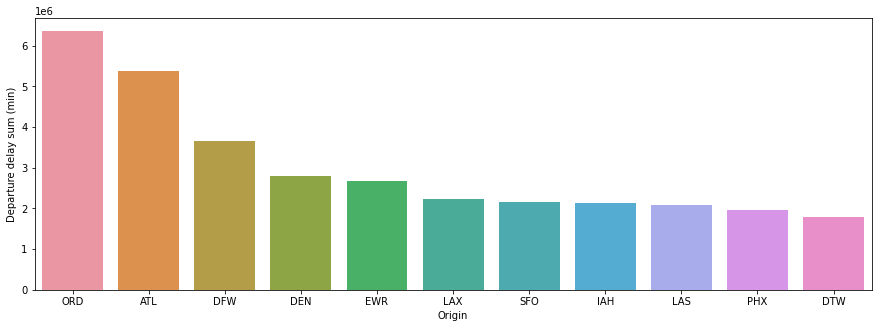

['ORD: Chicago', 'ATL: Atlanta', 'DFW: Dallas Fortworth', 'DEN: Denver', 'EWR: Newark', 'LAX: Los Ángeles', 'IAH: Houston', 'PHX: Phoenix', 'DTW: Detroit']


In [39]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x='Origin', y='DepDelay', data=Airport_delays)
ax.set_ylabel('Departure delay sum (min)')
ax.set_xlabel('Origin')
plt.show()
print(['ORD: Chicago', 'ATL: Atlanta', 'DFW: Dallas Fortworth', 'DEN: Denver','EWR: Newark','LAX: Los Ángeles',
       'IAH: Houston','PHX: Phoenix','DTW: Detroit'])

The three airports with more flight delayed are: ATL: Atlanta; ORD: Chicago and DFW: Dallas 

# Question 4 <a class="anchor" id="Q4"></a>

In [40]:
n_cancel_flights=df.Cancelled.value_counts()[1]
n_noncancel_flights=df.Cancelled.value_counts()[0]
df.Cancelled.value_counts()

0    199933
1        67
Name: Cancelled, dtype: int64

In [41]:
percentage_cancel=100*n_cancel_flights/(n_cancel_flights+n_noncancel_flights)
print('The percentage of cancellation flights is:'+str(percentage_cancel)+'%')

The percentage of cancellation flights is:0.0335%


# Question 5 <a class="anchor" id="Q5"></a>

In [42]:
Largest_distances = df[['Origin', 'Dest','Distance']]
Largest_distances = Largest_distances.groupby(by='Origin').max()
Largest_distances=Largest_distances.reset_index(drop=False)
Largest_distances=Largest_distances.sort_values(by='Distance', ascending=False).head(10)
display(Largest_distances.head(10))
print(['ORD: Chicago', 'ATL: Atlanta', 'DFW: Dallas Fortworth', 'DEN: Denver','EWR: Newark','LAX: Los Ángeles',
       'IAH: Houston','PHX: Phoenix','DTW: Detroit'])

,Origin,Dest,Distance
94,EWR,XNA,4962
127,HNL,SNA,4962
18,ATL,XNA,4502
207,ORD,XNA,4243
149,KOA,SNA,4213
196,MSP,XNA,3972
134,IAH,XNA,3904
79,DFW,XNA,3784
202,OGG,SNA,3711
16,ANC,SLC,3417


['ORD: Chicago', 'ATL: Atlanta', 'DFW: Dallas Fortworth', 'DEN: Denver', 'EWR: Newark', 'LAX: Los Ángeles', 'IAH: Houston', 'PHX: Phoenix', 'DTW: Detroit']


The largest flights occurr between EWR to XNA, HNL to SNA, and ATL to XNA.

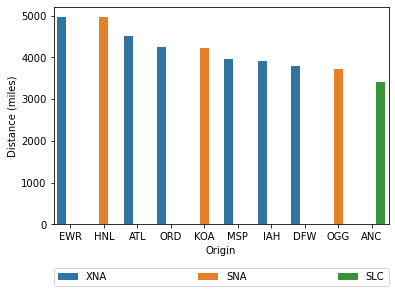

In [43]:
ax=sns.barplot(x='Origin', y='Distance', hue='Dest', data=Largest_distances)
ax.set_ylabel('Distance (miles)')
ax.set_xlabel('Origin')
plt.legend(bbox_to_anchor=(0, -.7, 1, .5), loc=1,
       ncol=3, mode="expand", borderaxespad=0.)
plt.show()

# Exporting the data to excel <a class="anchor" id="Exc"></a>

In [44]:
# determining the name of the file
file_name = 'Flights.xlsx'
dataframe_to_export=df
  
# saving the excel
dataframe_to_export.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


# Conclusion <a class="anchor" id="Concl"></a>

We have analysed the flights behaviour occurred during 2008 in US. We have observed that only 35% of the flights left without incidents, leaving the majority with delay, as only 0.04% of the flights were cancelled, being the main cause of the cancellation the weather. 

With respect the distribution of delays, they were focused in the periods close to holidays, being December and June the months with more delays in average. Moreover, we have observed a clear peak when travelling on Friday or Sunday, which corresponds with the beginning and ending of the weekend, respectively 

Finally, the airlines with more delays were Southwest Airlines and American Airlines. On the other hand, the airports with more delays were the ones of Chicago and Atlanta.